In [1]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from utils.rw_processed_data import load_processed_data


In [3]:
data = load_processed_data(folder_name='OMNI', name='full_data')

In [4]:
data.drop(data[data['Dst_index'] == 999.9].index, inplace=True)
data.drop(data[data['B_scalar'] == 999.9].index, inplace=True)
data.drop(data[data['Bz_GSM'] == 999.9].index, inplace=True)
data.drop(data[data['Dst_index'] == 999.9].index, inplace=True)

In [5]:
filter_data = data.copy()

In [6]:
data

,date,Dst_index,Kp_index,B_scalar,Bz_GSM,classification
6,2001-06-07,-36.0,57.0,12.5,-6.1,fraca
11,2001-06-12,-61.0,53.0,19.3,-11.8,moderada
17,2001-06-18,-33.0,57.0,8.4,-4.1,fraca
26,2001-06-27,-46.0,37.0,16.3,-7.1,fraca
61,1981-09-01,-38.0,43.0,9.9,-5.9,fraca
...,...,...,...,...,...,...
21176,1996-09-22,-37.0,27.0,7.5,-3.2,fraca
21177,1996-09-23,-42.0,50.0,12.2,-7.5,fraca
21180,1996-09-26,-38.0,50.0,9.3,-5.7,fraca
21183,1996-09-29,-42.0,43.0,9.7,-4.8,fraca


In [7]:
def class_count(df):
    count = {"fraca": 0, "moderada": 0, "intensa": 0, "super_intensa": 0}
    for i in range(1, len(df)):
        count[df['classification'].iloc[i]]+=1
    print(count)

class_count(data)


{'fraca': 2241, 'moderada': 1105, 'intensa': 216, 'super_intensa': 15}


In [8]:
le = LabelEncoder()

filter_data['classification'] = le.fit_transform(filter_data['classification'])

In [9]:
X = filter_data[['Dst_index', 'Kp_index', 'B_scalar']].copy()
y = filter_data['classification']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [200]:
clf.support_vectors_

array([[ -50. ,   57. ,   27.8],
       [ -50. ,   23. ,    6.6],
       [ -50. ,   67. ,   18.6],
       [ -50. ,   57. ,    9.2],
       [ -50. ,   50. ,    6.2],
       [ -50. ,   43. ,    5.4],
       [-240. ,   77. ,   37.4],
       [-247. ,   83. ,   54.8],
       [-101. ,   63. ,   18.2],
       [-101. ,   47. ,   16.9],
       [ -51. ,   60. ,   11.4],
       [ -51. ,   50. ,    6.8],
       [ -51. ,   33. ,   10.1],
       [-100. ,   47. ,   18.6],
       [ -51. ,   53. ,   20.8],
       [ -51. ,   30. ,   12.7],
       [ -51. ,   53. ,   15.4],
       [ -51. ,   57. ,   15.7],
       [-100. ,   60. ,   16.2],
       [ -51. ,   57. ,    8.6],
       [ -51. ,   43. ,    6. ],
       [ -51. ,   50. ,   20.4],
       [ -51. ,   57. ,   20.8],
       [ -51. ,   57. ,    6.8],
       [ -51. ,   33. ,    6.8],
       [ -51. ,   50. ,    9.9],
       [ -99. ,   70. ,   28.4],
       [ -51. ,   37. ,    9.3],
       [-263. ,   87. ,   36. ]])

In [229]:
clf.coef_

array([[ 3.92178082e-02,  5.31219771e-06, -8.51271166e-06],
       [ 2.00018580e+00,  1.32619295e-05,  5.10555990e-06],
       [ 9.24644496e-03, -8.68210795e-04, -7.55343391e-04],
       [-1.71113407e+00,  2.07132398e-02,  1.12303015e-01],
       [ 7.31981425e-02, -2.61762383e-02,  3.85159337e-02],
       [ 1.20398948e-02, -1.24803788e-03, -5.57946346e-04]])

In [230]:
clf.intercept_

array([   2.96081077,  101.00863365,    1.53454174, -175.17474445,
         19.14212399,    2.29515783])

In [410]:
def linear_regression_line(ax, x_linear, y_linear):
    from sklearn.linear_model import LinearRegression

    # obtain linear regression line
    # x_linear = np.array([-101., -101., -100., -100., -99.])
    # y_linear = np.array([63., 47., 47., 60., 70.])
    # m, b = np.polyfit(x_linear, y_linear, 1)

    model = LinearRegression()
    model.fit(x_linear.reshape(-1, 1), y_linear.reshape(-1, 1))
    _ = model.predict(x_linear.reshape(-1, 1))
    # ax1.plot(x_linear, y_linear_predict, color='red', linestyle='--')

    ex_x = np.linspace(x_linear.min()-6, x_linear.max() + 10, 10).reshape(-1, 1)
    ex_pred = model.predict(ex_x)
    ax.plot(ex_x, ex_pred, color='orangered', linestyle='dotted', linewidth=1.0)

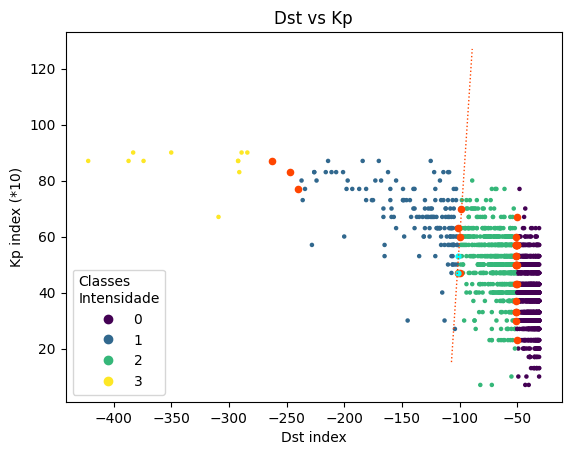

In [411]:
fig1, ax1 = plt.subplots()

scatter = ax1.scatter(
    x=X_train['Dst_index'],
    y=X_train['Kp_index'],
    s=5,
    c=y_train,
)

# pontos para vetores de suporte
ax1.scatter(
    x=clf.support_vectors_[:, 0],
    y=clf.support_vectors_[:, 1],
    s=20,
    c='orangered',
)

# legenda com base nas classes
legend1 = ax1.legend(
    *scatter.legend_elements(),
    loc="lower left",
    title="Classes\nIntensidade",
)

ax1.set_title('Dst vs Kp')
ax1.set_xlabel('Dst index')
ax1.set_ylabel('Kp index (*10)')

"""
0: fraca
1: intensa
2: moderada
3: super_intensa
"""


x_linear = np.array([-101., -101., -100., -100., -99.])
y_linear = np.array([63., 47., 47., 60., 70.])
_ = linear_regression_line(ax1, x_linear, y_linear)

# x_linear = np.array([-240., -247., -263.])
# y_linear = np.array([77., 83., 87.])
# _ = linear_regression_line(ax1, x_linear, y_linear)

# x_linear = np.array([-50., -50., -50., -50., -50., -50., -51., -51., -51., -51., -51., -51., -51., -51., -51., -51., -51., -51., -51., -51., -51.])
# y_linear = np.array([57. , 23. , 67. , 57. , 50. , 43. , 60. , 50. , 33. , 53. , 30. , 53. , 57. , 57. , 43. , 50. , 57. , 57. , 33. , 50. , 37. ])
# _ = linear_regression_line(ax1, x_linear, y_linear)


x_outliers = [-101.0, -101.0]
y_outliers = [53.0, 47.0]

ax1.scatter(
    x=x_outliers,
    y=y_outliers,
    s=12,
    c='aqua',
)

plt.show()

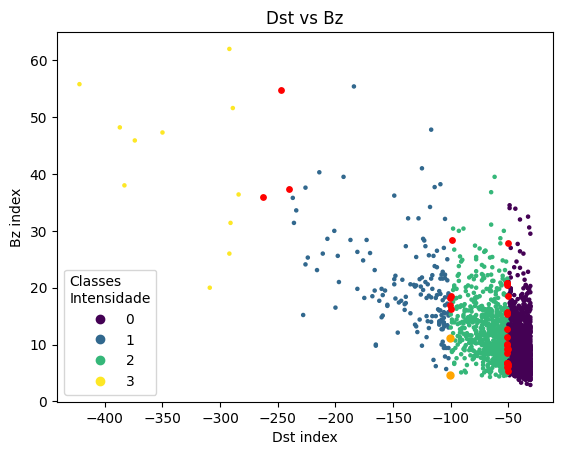

In [303]:
fig1, ax1 = plt.subplots()

scatter = ax1.scatter(
    x=X_train['Dst_index'],
    y=X_train['B_scalar'],
    c=y_train,
    s=5,
)

# pontos para vetores de suporte
ax1.scatter(
    x=clf.support_vectors_[:, 0],
    y=clf.support_vectors_[:, 2],
    c='r',
    s=15,
)

# legenda com base nas classes
legend1 = ax1.legend(
    *scatter.legend_elements(),
    loc="lower left",
    title="Classes\nIntensidade",
)

x_outliers = [-101.0, -101.0]
y_outliers = [11.1, 4.7]
ax1.scatter(
    x=x_outliers,
    y=y_outliers,
    s=25,
    c='orange',
)

ax1.set_title('Dst vs Bz')
ax1.set_xlabel('Dst index')
ax1.set_ylabel('Bz index')

plt.show()

In [20]:
y_predict = clf.predict(X_test)

In [272]:
y_predict

array([2, 2, 0, ..., 0, 2, 0])

In [273]:
y_test

5480     2
16340    2
8317     0
2985     0
8601     2
        ..
7782     2
19668    0
4030     0
17647    2
7835     0
Name: classification, Length: 1181, dtype: int64

In [295]:
np.where(y_test != y_predict)[0]

array([522, 572])

In [296]:
(y_test != y_predict).index[np.where(y_test != y_predict)[0]]

Index([4425, 19008], dtype='int64')

In [297]:
filter_data.filter(items=[4425, 19008], axis=0)

,date,Dst_index,Kp_index,B_scalar,Bz_GSM,classification
4425,1982-02-08,-101.0,53.0,11.1,-8.8,1
19008,2001-04-12,-101.0,47.0,4.7,-3.3,1


In [21]:
matrix_data = confusion_matrix(y_test, y_predict)

In [155]:
def plot_confusion_matrix(matrix_data):  
    fig, ax = plt.subplots()
    sns.heatmap(
        matrix_data, 
        annot=True, 
        ax=ax, 
        fmt='d', 
        cmap='Reds',
        cbar=False,
        xticklabels=le.classes_,
        yticklabels=le.classes_
    )

    ax.set_title("Matriz de Confusão", fontsize=16)
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

    plt.tight_layout()

In [23]:
[print(f'{i}: {v}') for i, v in enumerate(le.classes_)]

0: fraca
1: intensa
2: moderada
3: super_intensa


[None, None, None, None]

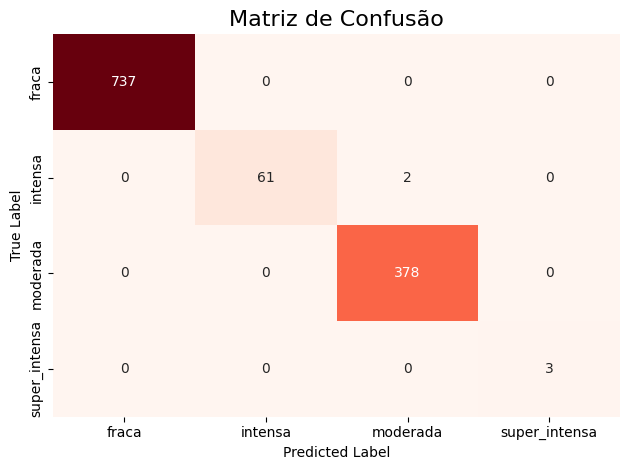

In [156]:
plot_confusion_matrix(matrix_data)

In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_test, y_pred=y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       737
           1       1.00      0.97      0.98        63
           2       0.99      1.00      1.00       378
           3       1.00      1.00      1.00         3

    accuracy                           1.00      1181
   macro avg       1.00      0.99      1.00      1181
weighted avg       1.00      1.00      1.00      1181

